In [23]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

In [ ]:
nodes_df = pd.read_csv("extract_nodes.csv",header=None,names=['profile_id'])
edges_df = pd.read_csv("extract_edges.csv",header=None,names=['source','target'])


In [32]:
len(edges_df)

53452

In [34]:
len(nodes_df)

25669

In [35]:
nodes_df.head(5)

,profile_id
0,14
1,512
2,533
3,534
4,564


In [36]:
edges_df.head(5)

,source,target
0,12370,8766445
1,12370,645019
2,12370,8762949
3,12370,1462053
4,12601,1462053


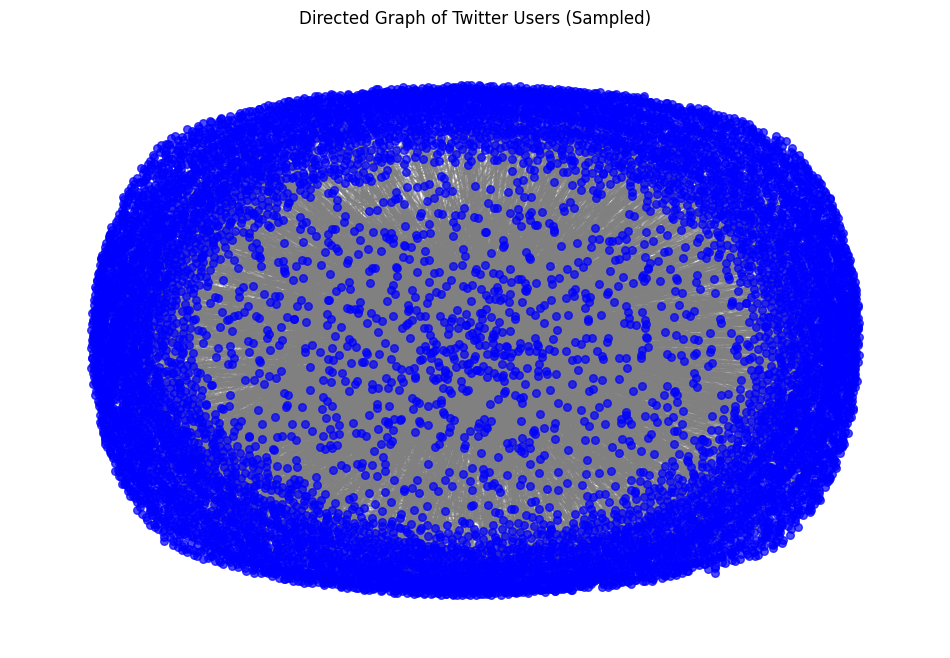

In [40]:
#Vẽ mối quan hệ
G = nx.DiGraph()

for idx, row in nodes_df.iterrows():
    G.add_node(row['profile_id'])

for idx, row in edges_df.iterrows():
    src = row['source']
    tgt = row['target']
    G.add_edge(src, tgt)

# 3. (Tùy chọn) Lấy mẫu một phần đồ thị để vẽ, tránh quá tải
# Ví dụ: Lấy ngẫu nhiên 200 node rồi tạo subgraph
# Lưu ý: Chỉ nên làm nếu dữ liệu quá lớn
num_sample = 10000
if len(G.nodes) > num_sample:
    sampled_nodes = set(random.sample(sorted(G.nodes()), num_sample))
    # Tạo subgraph chỉ chứa node đã lấy mẫu và các cạnh liên quan
    G_sub = G.subgraph(sampled_nodes).copy()
else:
    G_sub = G

# 4. Vẽ đồ thị (với NetworkX + matplotlib)
plt.figure(figsize=(12, 8))

pos = nx.spring_layout(G_sub, k=0.1, iterations=20)

nx.draw_networkx_nodes(G_sub, pos, 
                       node_size=30, 
                       node_color='blue', 
                       alpha=0.7)

# Vẽ cạnh có hướng
nx.draw_networkx_edges(G_sub, pos,
                       edge_color='gray',
                       arrows=True,
                       arrowstyle='-|>', 
                       arrowsize=10, 
                       alpha=0.5)

# Tắt trục tọa độ cho gọn
plt.axis('off')
plt.title("Directed Graph of Twitter Users (Sampled)")
plt.show()

In [41]:
nodes_df.dropna(subset=['profile_id'], inplace=True)

nodes_df.drop_duplicates(subset=['profile_id'], inplace=True)

print("Số lượng nút sau khi làm sạch:", len(nodes_df))

Số lượng nút sau khi làm sạch: 25669


In [42]:
edges_df.dropna(subset=['source', 'target'], inplace=True)

edges_df.drop_duplicates(subset=['source', 'target'], inplace=True)

print("Số lượng cạnh sau khi loại bỏ missing value và duplicate:", len(edges_df))

Số lượng cạnh sau khi loại bỏ missing value và duplicate: 53452


In [44]:
#Kiểm tra tính nhất quán
node_ids = set(nodes_df['profile_id'])

missing_source = edges_df[~edges_df['source'].isin(node_ids)]
missing_target = edges_df[~edges_df['target'].isin(node_ids)]

print("Số lượng cạnh có source không tồn tại trong nodes:", len(missing_source))
print("Số lượng cạnh có target không tồn tại trong nodes:", len(missing_target))

edges_df = edges_df[edges_df['source'].isin(node_ids) & edges_df['target'].isin(node_ids)]
print("Số lượng cạnh sau khi làm sạch:", len(edges_df))

nodes_df.to_csv('clean_nodes.csv', index=False)
edges_df.to_csv('clean_edges.csv', index=False)

Số lượng cạnh có source không tồn tại trong nodes: 0
Số lượng cạnh có target không tồn tại trong nodes: 0
Số lượng cạnh sau khi làm sạch: 53452
